<a href="https://colab.research.google.com/github/cychen116/DataAnalysis_practice/blob/main/15_ML_NeuralNetwork_from_scratch_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np
import pandas as pd

# Neural Network Functions

In [2]:
# Base class
class Layer:
    def __init__(self):
        self.input = None
        self.output = None

    # computes the output Y of a layer for a given input X
    def forward_propagation(self, input):
        raise NotImplementedError

    # computes dE/dX for a given dE/dY (and update parameters if any)
    def backward_propagation(self, output_error, learning_rate):
        raise NotImplementedError

In [3]:
class FCLayer(Layer):
    def __init__(self, input_size, output_size):
      self.weights = np.random.rand(input_size, output_size) - 0.5
      self.bias = np.random.rand(1, output_size) - 0.5
    
    def forward_propagation(self,input_data):
      self.input = input_data
      self.output = np.dot(self.input,self.weights)+self.bias
      return(self.output)

    ## compute dE/dw, de/dB for a given outputt erroor. Returns input error to be given t the next layer
    def backward_propagation(self,output_error, learning_rate):
      input_error = np.dot(output_error, self.weights.T)
      weights_error = np.dot(self.input.T, output_error)

      self.weights -= learning_rate * weights_error
      self.bias -= learning_rate * output_error
      return(input_error)

In [4]:
class ActivationLayer(Layer):
    def __init__(self):
      self.activation = lambda x: np.tanh(x)  #over sigoma, tanh pi*0.25, which provide strong peak, cleaner and easier to compute
      self.activation_prime = lambda x: 1-np.tanh(x)**2;
    
    def forward_propagation(self, input_data):
      self.input = input_data
      self.output = self.activation(self.input)
      return(self.output)
    
    def backward_propagation(self, output_error, learning_rate):
      return(self.activation_prime(self.input) * output_error)

In [5]:
# loss function and its derivative
def mse(y_true, y_pred):
    return np.mean(np.power(y_true - y_pred, 2));

def mse_prime(y_true, y_pred):
    return 2*(y_pred-y_true)/y_true.size;

In [6]:
class Network:
  def __init__(self):
    self.layers=[]
    self.loss=None
    self.loss_prime=None

  def add(self,layer):
    self.layers.append(layer)

  def use(self,loss,loss_prime):
    self.loss = loss
    self.loss_prime = loss_prime

  def predict(self,input_data):
    result=[]
    for i in range(len(input_data)):
      output=input_data[i]
      for layer in self.layers:
        output= layer.forward_propagation(output)
      result.append(output)
    return(result)

  def fit(self, x_train, y_train, epochs, learning_rate):
    samples = len(x_train)
    errors=[]

    for i in range(epochs):
      err = 0
      for j in range(samples):
        output = x_train[j]
        for layer in self.layers:
          output = layer.forward_propagation(output)
        #print(y_train[j].shape, output.shape)
        err += self.loss(y_train[j], output)

        error = self.loss_prime(y_train[j], output)
        for layer in reversed(self.layers):
          error = layer.backward_propagation(error, learning_rate)
      errors.append(err/samples)

      print('epoch %d/%d   error=%f' % (i+1, epochs, err))
    return(errors)

# Testing Functions

In [7]:
x_train = np.array([[[0,0]], [[0,1]], [[1,0]], [[1,1]]])
y_train = np.array([[[0]], [[1]], [[1]], [[0]]])

In [10]:
net = Network()
net.add(FCLayer(2,5))
net.add(ActivationLayer())
net.add(FCLayer(5,1))
net.add(ActivationLayer())
net.use(mse, mse_prime)

In [11]:
err = net.fit(x_train, y_train, epochs=300, learning_rate=0.1)

epoch 1/300   error=1.883896
epoch 2/300   error=1.410552
epoch 3/300   error=1.345683
epoch 4/300   error=1.326607
epoch 5/300   error=1.316765
epoch 6/300   error=1.309700
epoch 7/300   error=1.303687
epoch 8/300   error=1.298166
epoch 9/300   error=1.292938
epoch 10/300   error=1.287927
epoch 11/300   error=1.283102
epoch 12/300   error=1.278446
epoch 13/300   error=1.273950
epoch 14/300   error=1.269606
epoch 15/300   error=1.265409
epoch 16/300   error=1.261353
epoch 17/300   error=1.257431
epoch 18/300   error=1.253639
epoch 19/300   error=1.249972
epoch 20/300   error=1.246426
epoch 21/300   error=1.242996
epoch 22/300   error=1.239678
epoch 23/300   error=1.236469
epoch 24/300   error=1.233366
epoch 25/300   error=1.230366
epoch 26/300   error=1.227464
epoch 27/300   error=1.224660
epoch 28/300   error=1.221950
epoch 29/300   error=1.219332
epoch 30/300   error=1.216803
epoch 31/300   error=1.214362
epoch 32/300   error=1.212005
epoch 33/300   error=1.209731
epoch 34/300   erro

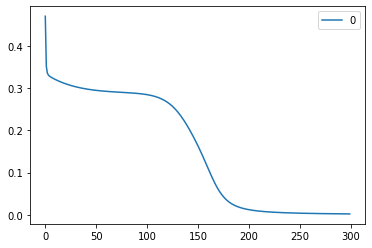

In [12]:
pd.DataFrame(err).plot()

In [13]:
out = net.predict(x_train)
print(x_train, out)

[[[0 0]]

 [[0 1]]

 [[1 0]]

 [[1 1]]] [array([[0.00725305]]), array([[0.93696663]]), array([[0.93374986]]), array([[-0.00497007]])]


# Digits Recognition

In [15]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 1, 28*28).astype('float32')/255
y_train = np_utils.to_categorical(y_train)

x_test = x_test.reshape(x_test.shape[0], 1, 28*28).astype('float32')/255
y_test = np_utils.to_categorical(y_test)

11501568/11490434 [==============================] - 0s 0us/step


In [16]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [17]:
net = Network()
net.add(FCLayer(28*28, 100))
net.add(ActivationLayer())
net.add(FCLayer(100, 50)) 
net.add(ActivationLayer())
net.add(FCLayer(50, 10)) 
net.add(ActivationLayer())
net.use(mse, mse_prime)

errors = net.fit(x_train[0:5000], y_train[0:5000], epochs=35, learning_rate=0.1) #sample the testing number, x_train[0:5000]

epoch 1/35   error=579.638632
epoch 2/35   error=265.217903
epoch 3/35   error=190.762111
epoch 4/35   error=151.655848
epoch 5/35   error=129.249735
epoch 6/35   error=113.766096
epoch 7/35   error=101.272831
epoch 8/35   error=91.029008
epoch 9/35   error=83.457401
epoch 10/35   error=77.320805
epoch 11/35   error=71.970475
epoch 12/35   error=67.498914
epoch 13/35   error=63.490929
epoch 14/35   error=60.091839
epoch 15/35   error=57.070446
epoch 16/35   error=54.315229
epoch 17/35   error=51.909331
epoch 18/35   error=49.836703
epoch 19/35   error=48.073710
epoch 20/35   error=46.338833
epoch 21/35   error=44.616273
epoch 22/35   error=43.108176
epoch 23/35   error=41.701015
epoch 24/35   error=40.399548
epoch 25/35   error=39.160012
epoch 26/35   error=38.182511
epoch 27/35   error=37.154948
epoch 28/35   error=36.147427
epoch 29/35   error=35.182141
epoch 30/35   error=34.077603
epoch 31/35   error=33.021662
epoch 32/35   error=32.181918
epoch 33/35   error=31.283176
epoch 34/35 

In [18]:
print(net.predict(x_test[:3]))
print(y_test[:3])

[array([[ 6.09211269e-03, -2.17993050e-02,  9.50338938e-03,
         2.15199518e-02,  3.66315133e-04,  1.26212955e-02,
        -1.96558421e-02,  9.90136571e-01, -4.33053543e-02,
        -2.17162265e-02]]), array([[-0.01099485, -0.00765838,  0.98306643,  0.03016832,  0.00973875,
         0.03335497,  0.05912392, -0.0023395 , -0.2397076 , -0.00143443]]), array([[ 0.00632424,  0.98306759,  0.00560132,  0.01540759,  0.01715542,
         0.01134257, -0.01704351, -0.00525591, -0.03709321, -0.04638728]])]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [19]:
for i in range(10):
  out = sum((net.predict(x_test[i]) - y_test[i])[0][0])
  print(out)
  print(out<0.5)

-0.06623709248934702
True
-0.14668237518293537
True
-0.06688117255311343
True
-0.059676426178211325
True
0.06502103414947903
True
-0.07815682165510897
True
0.1086831453633655
True
0.07534861865339901
True
0.3566473961611921
True
-0.013777990532575862
True


In [20]:
errors=[]
for i in range(1000):
  out=sum((net.predict(x_test[i]) - y_test[i])[0][0])
  errors.append(0 if out<0.5 else 1)

In [21]:
np.mean(errors)

0.02